In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [2]:
# ---------- 0) Generate Synthetic Data ----------
"""
Purpose: Create a simple dataset with 4 well-separated clusters.
Why use it: Ideal for demonstrating K-Means clustering behavior.
When to use: Teaching or testing clustering concepts.
"""
X, y_true = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=0.7,
    random_state=42
)

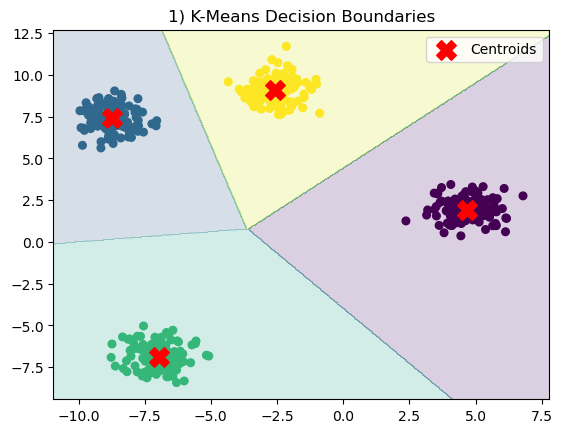

In [3]:
# ---------- 1) K-Means Decision Boundaries ----------
"""
- Plot name: K-Means Decision Boundaries
- X-axis / Y-axis: Feature dimensions (2D feature space)
- When useful: Visualize how K-Means partitions the space into regions.
- Conditions/Caveats: Works best for 2D data; boundaries are Voronoi regions.
"""
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap="viridis")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label="Centroids")
plt.title("1) K-Means Decision Boundaries")
plt.legend()
plt.show()

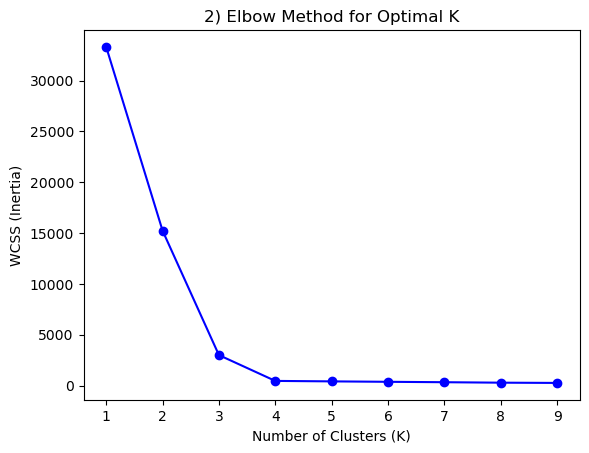

In [4]:
# ---------- 2) Elbow Method for Optimal K ----------
"""
- Plot name: Elbow Method (WCSS vs K)
- X-axis: Number of Clusters (K)
- Y-axis: Within-Cluster Sum of Squares (Inertia)
- When useful: Determine optimal K by locating the “elbow” point.
- Conditions/Caveats: Subjective; use silhouette or gap statistics for confirmation.
"""
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("2) Elbow Method for Optimal K")
plt.show()

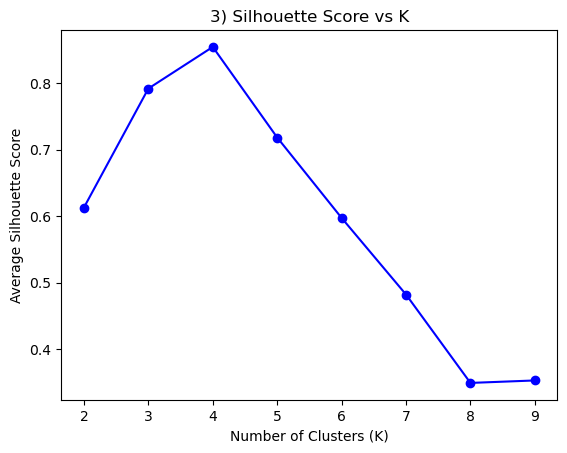

In [5]:
# ---------- 3) Silhouette Score vs K ----------
"""
- Plot name: Silhouette Score vs K
- X-axis: Number of clusters (K)
- Y-axis: Average silhouette score
- When useful: Evaluate how well clusters are separated and compact.
- Conditions/Caveats: Higher scores indicate better clustering; max near true K.
"""
silhouette_avg = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    score = silhouette_score(X, km.labels_)
    silhouette_avg.append(score)

plt.plot(K, silhouette_avg, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Average Silhouette Score")
plt.title("3) Silhouette Score vs K")
plt.show()

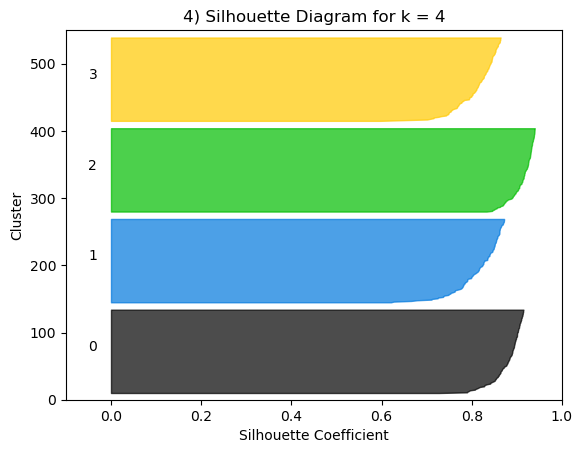

In [6]:
# ---------- 4) Silhouette Diagram ----------
"""
- Plot name: Silhouette Diagram
- X-axis: Silhouette Coefficient (per sample)
- Y-axis: Cluster ID
- When useful: Diagnose cluster consistency and overlap.
- Conditions/Caveats: Bars extending into negative values → misclassified points.
"""
k = 4
fig, ax1 = plt.subplots(1, 1)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (k + 1) * 10])

cluster_labels = KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(X)
silhouette_vals = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(k):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("4) Silhouette Diagram for k = 4")
ax1.set_xlabel("Silhouette Coefficient")
ax1.set_ylabel("Cluster")
plt.show()


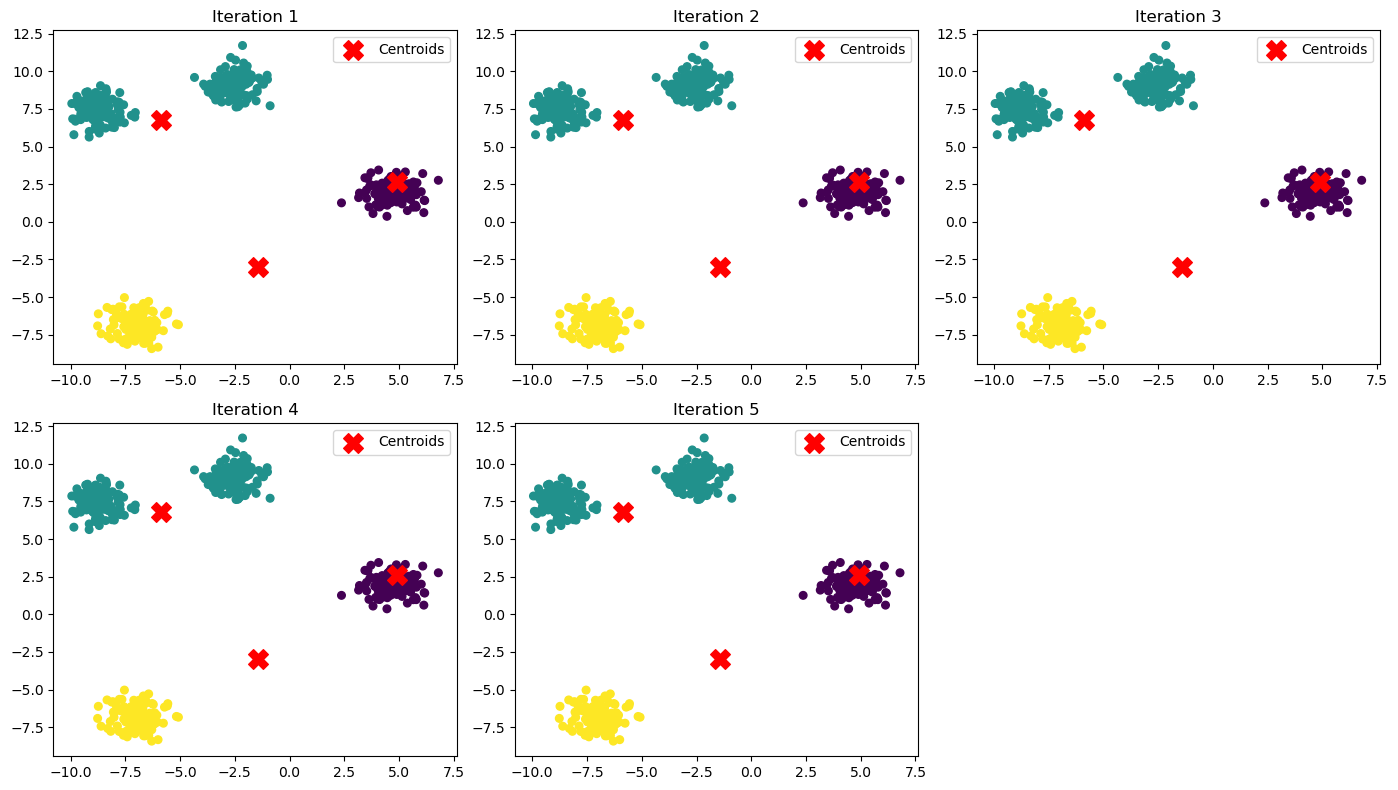

In [7]:
# ---------- 5) Iteration-wise Convergence ----------
"""
- Plot name: K-Means Iteration Evolution
- X-axis / Y-axis: Feature space (2D)
- When useful: Show how cluster assignments and centroids evolve during iterations.
- Conditions/Caveats: Visualization simplified for demonstration; in practice, convergence is faster.
"""
kmeans = KMeans(n_clusters=3, init="random", max_iter=1, n_init=1, random_state=42)
centers_history = []
labels_history = []

for i in range(5):  # record first 5 iterations
    kmeans.fit(X)
    centers_history.append(kmeans.cluster_centers_.copy())
    labels_history.append(kmeans.labels_)

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.ravel()

for i in range(5):
    axes[i].scatter(X[:, 0], X[:, 1], c=labels_history[i], cmap="viridis", s=30)
    axes[i].scatter(centers_history[i][:, 0], centers_history[i][:, 1], 
                    c="red", marker="X", s=200, label="Centroids")
    axes[i].set_title(f"Iteration {i+1}")
    axes[i].legend()

axes[5].axis("off")
plt.tight_layout()
plt.show()


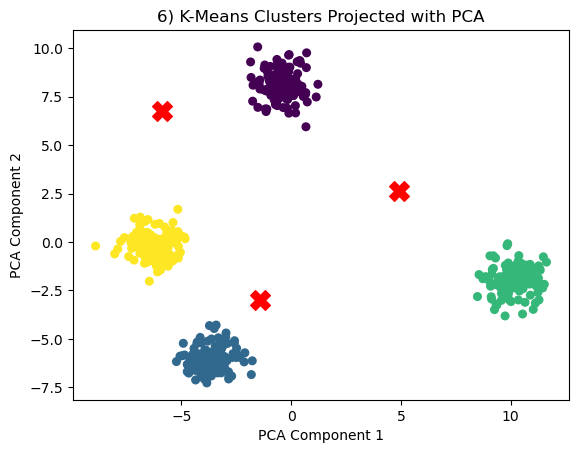

In [8]:
# ---------- 6) PCA Projection of Clusters ----------
"""
- Plot name: K-Means Clusters Projected via PCA
- X-axis: PCA Component 1
- Y-axis: PCA Component 2
- When useful: Visualize high-dimensional clusters in 2D space.
- Conditions/Caveats: PCA may distort distances; interpret qualitatively.
"""
pca = PCA(2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X')
plt.title("6) K-Means Clusters Projected with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()